In [5]:
import pandas as pd
import string

In [6]:
df = pd.read_csv('srpski.csv', sep='\t')
df = df.drop(columns=['Rbr', 'SR', 'sr/sr', 'Naslov', 'Jezik'])

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower()

In [8]:
import classla

In [9]:
classla.download('sr')

2023-12-29 15:31:27 INFO: Downloading these customized packages for language: sr (Serbian)...
| Processor | Package  |
------------------------
| tokenize  | standard |
| pos       | standard |
| lemma     | standard |
| depparse  | standard |
| ner       | standard |
| pretrain  | standard |

2023-12-29 15:31:27 INFO: File exists: C:\Users\raden\classla_resources\sr\pos\standard.pt.
2023-12-29 15:31:28 INFO: File exists: C:\Users\raden\classla_resources\sr\lemma\standard.pt.
2023-12-29 15:32:03 INFO: Finished downloading models and saved to C:\Users\raden\classla_resources.


In [10]:
nlp = classla.Pipeline("sr",  processors='tokenize,lemma,pos')

2023-12-29 15:32:03 INFO: Loading these models for language: sr (Serbian):
| Processor | Package  |
------------------------
| tokenize  | standard |
| pos       | standard |
| lemma     | standard |

2023-12-29 15:32:03 INFO: Use device: cpu
2023-12-29 15:32:03 INFO: Loading: tokenize
2023-12-29 15:32:03 INFO: Loading: pos
2023-12-29 15:32:03 INFO: Loading: lemma
2023-12-29 15:32:11 INFO: Done loading processors!


In [11]:
def process_text(text):
    doc = nlp(text)
    
    lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
    
    return lemmas

df['Procesiran tekst'] = df['Tekst'].apply(process_text)


In [12]:
from nltk import FreqDist

C:\Users\raden\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
def remove_punctuation(words):
    punctuation = string.punctuation
    punctuation_additional = ['``', "'", "''",'...','—',"-",';', ':',"“", "„", ".."]
    words_without_punct = [word for word in words if word not in punctuation and word not in punctuation_additional] 
    return words_without_punct

df['Procesiran tekst'] = df['Procesiran tekst'].apply(remove_punctuation)

In [14]:
all_words = [word for words in df['Procesiran tekst'] for word in words]
fdist = FreqDist(all_words)
def remove_freq_words(words):
    fw_words = fdist.most_common(100)
    freq_words = [word for word,count in fw_words if count > 100 or len(word) in (1,2)]
    words_without_punct = [word for word in words if word not in freq_words] 
    return words_without_punct

df['Procesiran tekst'] = df['Procesiran tekst'].apply(remove_freq_words)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
author_texts = df['Procesiran tekst'].apply(' '.join)
vectorizer = TfidfVectorizer(max_features=3000)
tf_matrix = vectorizer.fit_transform(author_texts)
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tf_df

,1938,ah,ajduk,ako,ala,aleks,amo,ana,anđeo,ao,...,žmurka,žrtva,žuboriti,žudan,žudeti,žuditi,žudno,žulj,žut,žutilo
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(tf_matrix, df['Autor'], test_size=0.2, random_state=42, stratify=df['Autor'])

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [19]:
gradient_model = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=5, min_samples_leaf=4, n_estimators=100)
gradient_model.fit(X_train, y_train)
y_pred = gradient_model.predict(X_test)
report_gradient = accuracy_score(y_test, y_pred)
report_gradient

0.35714285714285715

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_depth=5,min_samples_split=15, n_estimators=300)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
report_forest = accuracy_score(y_test, y_pred)
report_forest

0.2857142857142857

In [21]:
MB_model = MultinomialNB()
MB_model.fit(X_train,y_train)
y_pred = MB_model.predict(X_test)
y_pred_train = MB_model.predict(X_train)
report_multinomial = accuracy_score(y_test, y_pred)
report1 = accuracy_score(y_train, y_pred_train)
report_multinomial


0.21428571428571427

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [23]:
svm_model = SVC(kernel='sigmoid', C=10, coef0=1.0, gamma='scale')  # You can adjust the kernel and other hyperparameters

svm_model.fit(X_train, y_train)

SVC(C=10, coef0=1.0, kernel='sigmoid')

In [ ]:
from sklearn.metrics import f1_score,

In [42]:
y_pred = svm_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)

print(f'Accuracy for SVC: {accuracy_svc}')

report_svc = classification_report(y_test, y_pred)
print('Classification Report for SVC:\n', report_svc)

f1_svc = f1_score(y_test, y_pred, average='weighted') 
print(f'F1 Score: {f1_svc}')

Accuracy for SVC: 0.4642857142857143
Classification Report for SVC:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         2
           4       0.33      1.00      0.50         2
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       0.00      0.00      0.00         2
          10       1.00      0.50      0.67         2
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         2
          13       0.20      0.33      0.25         3
          14       0.00      0.00      0.00         2

    accuracy                           0.46        28
   macro avg       0.45      0.42      0.40        28
weighted av

C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


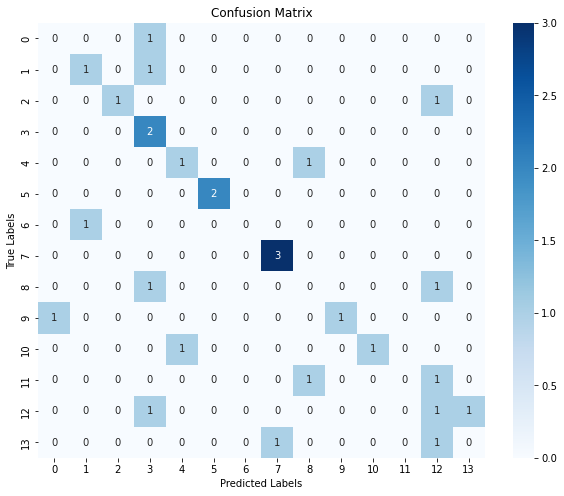

In [44]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVC')
plt.show()

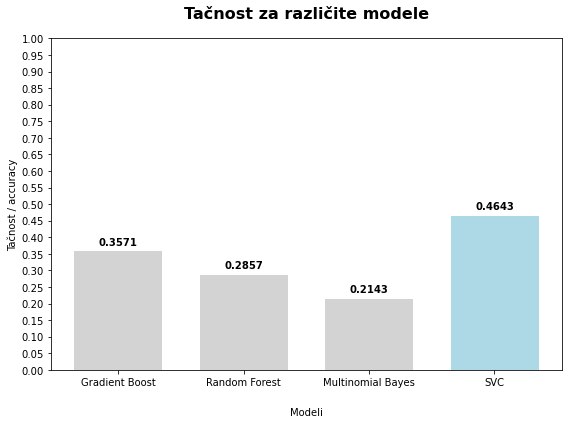

In [25]:
import matplotlib.pyplot as plt

modeli = ['Gradient Boost', 'Random Forest', 'Multinomial Bayes', 'SVC']

accuracy_scores = [report_gradient,report_forest,report_multinomial,accuracy_svc]
plt.figure(figsize=(8, 6))
bars = plt.bar(modeli, accuracy_scores, width=0.7, color=['lightgray', 'lightgray', 'lightgray','lightgray'])

plt.xlabel('Modeli',labelpad=20)
plt.ylabel('Tačnost / accuracy')
plt.title('Tačnost za različite modele',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = accuracy_scores.index(max(accuracy_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()